In [27]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection 
from sklearn.model_selection import GridSearchCV

In [3]:
lb=datasets.load_boston()

In [4]:
boston_frame = pd.DataFrame(lb.data)
boston_frame.columns = lb.feature_names
boston_frame['target'] = lb.target

In [5]:
boston_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [7]:
X=boston_frame.iloc[:,:-1]
y=boston_frame['target']
y=y.astype('int')

In [8]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
X=pd.DataFrame(X)
X.columns = lb.feature_names
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


### Попробуем регрессию Лассо

In [37]:
lasso_reg = linear_model.Lasso()

In [58]:
alpha_range = list(np.arange(0, 1, 0.1))
param_grid = dict(alpha=alpha_range)
lasso_grid = GridSearchCV(lasso_reg, param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

In [59]:
lasso_grid.fit(X, y)
for k in lasso_grid.cv_results_:
    print(k, ":", lasso_grid.cv_results_[k][0])

mean_fit_time : 0.007857942581176757
std_fit_time : 0.0010067332401566954
mean_score_time : 0.0010462045669555665
std_score_time : 0.00019573850112263155
param_alpha : 0.0
params : {'alpha': 0.0}
split0_test_score : -2.181185686088797
split1_test_score : -2.952868045046649
split2_test_score : -2.7440406377144018
split3_test_score : -4.559992199628544
split4_test_score : -4.102502014446407
split5_test_score : -3.617759412762089
split6_test_score : -2.6681953999789227
split7_test_score : -9.6415046882659
split8_test_score : -4.976571879372721
split9_test_score : -2.626586356670432
mean_test_score : -3.9994439999889924
std_test_score : 2.061828114221396
rank_test_score : 4
split0_train_score : -3.4305645515993697
split1_train_score : -3.3967956900731613
split2_train_score : -3.4442357749685675
split3_train_score : -3.1316694291916956
split4_train_score : -3.28770460346707
split5_train_score : -3.2847056566087693
split6_train_score : -3.4141107328935827
split7_train_score : -2.630169504660

/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/benito/anaconda3/lib/python3.7/site-pa

Text(0, 0.5, 'neg_mean_absolute_error')

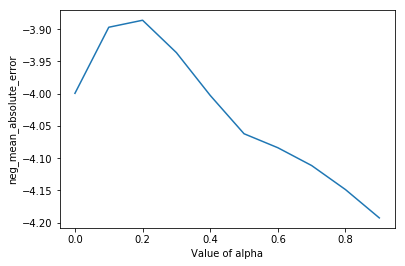

In [66]:
lasso_test_scores = lasso_grid.cv_results_['mean_test_score']
plt.plot(alpha_range, lasso_test_scores)
plt.xlabel('Value of alpha')
plt.ylabel('neg_mean_absolute_error')

In [69]:
print(lasso_grid.best_score_)
print(lasso_grid.best_params_)
print(lasso_grid.best_estimator_)

-3.8861301842351073
{'alpha': 0.2}
Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


### Попробуем регрессию Ридж

In [71]:
ridge_reg = linear_model.Ridge()
alpha_range = list(np.arange(0, 1, 0.1))
solver_range=['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
alpha_grid = dict(alpha=alpha_range)
solver_grid=dict(solver=solver_range)
grid=[alpha_grid, solver_grid]

In [72]:
ridge_grid = GridSearchCV(ridge_reg, grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

In [73]:
ridge_grid.fit(X, y)
for k in ridge_grid.cv_results_:
    print(k, ":", ridge_grid.cv_results_[k][0])

mean_fit_time : 0.038475656509399415
std_fit_time : 0.020439442196698687
mean_score_time : 0.001197671890258789
std_score_time : 0.00021135053847136004
param_alpha : 0.0
param_solver : --
params : {'alpha': 0.0}
split0_test_score : -2.181185686088796
split1_test_score : -2.952868045046652
split2_test_score : -2.744040637714362
split3_test_score : -4.559992199628551
split4_test_score : -4.102502014446403
split5_test_score : -3.6177594127621004
split6_test_score : -2.668195399978922
split7_test_score : -9.641504688265893
split8_test_score : -4.976571879372736
split9_test_score : -2.6265863566704426
mean_test_score : -3.9994439999889915
std_test_score : 2.0618281142213966
rank_test_score : 17
split0_train_score : -3.4305645515993692
split1_train_score : -3.39679569007316
split2_train_score : -3.4442357749685697
split3_train_score : -3.131669429191694
split4_train_score : -3.2877046034670676
split5_train_score : -3.2847056566087693
split6_train_score : -3.4141107328935836
split7_train_scor

/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/benito/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/benito/anaconda3/lib/python3.7/site-pa

In [75]:
print(ridge_grid.best_score_)
print(ridge_grid.best_params_)
print(ridge_grid.best_estimator_)

-3.985957564454115
{'solver': 'sag'}
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='sag', tol=0.001)


### Наилучший результат дала регрессия Лассо с 'alpha': 0.2